# Imports

In [1]:
import pickle
import numpy as np
from random import shuffle
from agent_code.my_agent.algorithms import *
from settings import s
import time
import matplotlib.pyplot as plt
import copy
import os

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


# Training Weights from Simple Agent

In [3]:
def train_game(data, weights, alpha, gamma):
    for i in range(len(data)-1):
        prev_state = data[i]['state']
        prev_action = data[i]['action']
        next_state = data[i+1]['state']
        next_action = data[i+1]['action']
        
        reward = -1
        
        if data[i]['state']['step'] != 1:
            for event in data[i]['events']:
                if event == e.BOMB_DROPPED:
                    reward += 1
                elif event == e.COIN_COLLECTED:
                    reward += 100
                elif event == e.KILLED_SELF:
                    reward -= 100
                elif event == e.CRATE_DESTROYED:
                    reward += 10
                elif event == e.COIN_FOUND:
                    reward += 30
                elif event == e.KILLED_OPPONENT:
                    reward += 300
                elif event == e.GOT_KILLED:
                    reward -= 300
                elif event == e.SURVIVED_ROUND:
                    reward += 100
                elif event == e.INVALID_ACTION:
                    reward -= 2


                
        
        f0 = np.ones(6)  # for bias
        f1 = feature1(next_state) # reward good action
        f2 = feature2(next_state) # penalization bad action
        f3 = feature3(next_state)
        f4 = feature4(next_state) # reward good action
        f5 = feature5(next_state)  # penalize bad action
        f6 = feature6(next_state)  # reward good action
        f7 = feature7(next_state) # reward action
        #f8 = feature8(next_state) # rewards good action
        f9 = feature9(next_state) # rewards good action
        f10 = feature10(next_state) # rewards good action
        f11 = feature11(next_state)
        f12 = feature12(next_state)
        f13 = feature13(next_state)
        f14 = feature14(next_state)
        f15 = feature15(next_state)
        next_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
          
        f0 = np.ones(6)  # for bias
        f1 = feature1(prev_state) # reward good action
        f2 = feature2(prev_state) # penalization bad action
        f3 = feature3(prev_state)
        f4 = feature4(prev_state) # reward good action
        f5 = feature5(prev_state)  # penalize bad action
        f6 = feature6(prev_state)  # reward good action
        f7 = feature7(prev_state) # reward action
        #f8 = feature8(prev_state) # rewards good action
        f9 = feature9(prev_state) # rewards good action
        f10 = feature10(prev_state) # rewards good action
        f11 = feature11(prev_state)
        f12 = feature12(prev_state)
        f13 = feature13(prev_state)
        f14 = feature14(prev_state)
        f15 = feature15(prev_state)
        prev_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
        prev_sa = prev_state[s.actions.index(prev_action),:]
        
        new_weights = q_gd_linapprox(next_state, prev_sa, reward, 
                                     weights, alpha, gamma)
        weights = new_weights
        
        alpha = 1/data[i]['state']['step']
        #gamma = gamma**data[i]['state']['step']
        
    return weights   

In [ ]:
alpha = 0.2
gamma = 0.95
weights1 = np.ones(15)
for file in os.listdir('data-collect'):
   if file.__contains__('game_'):
        print(file)
        f = open('data-collect/'+file, 'rb')
        data = sorted(pickle.load(f), key = lambda k: k['state']['step'])
        weights1 = train_game(data, weights, alpha, gamma)
        

# Training Results

In [2]:
from jupyterthemes import jtplot
jtplot.reset()

50


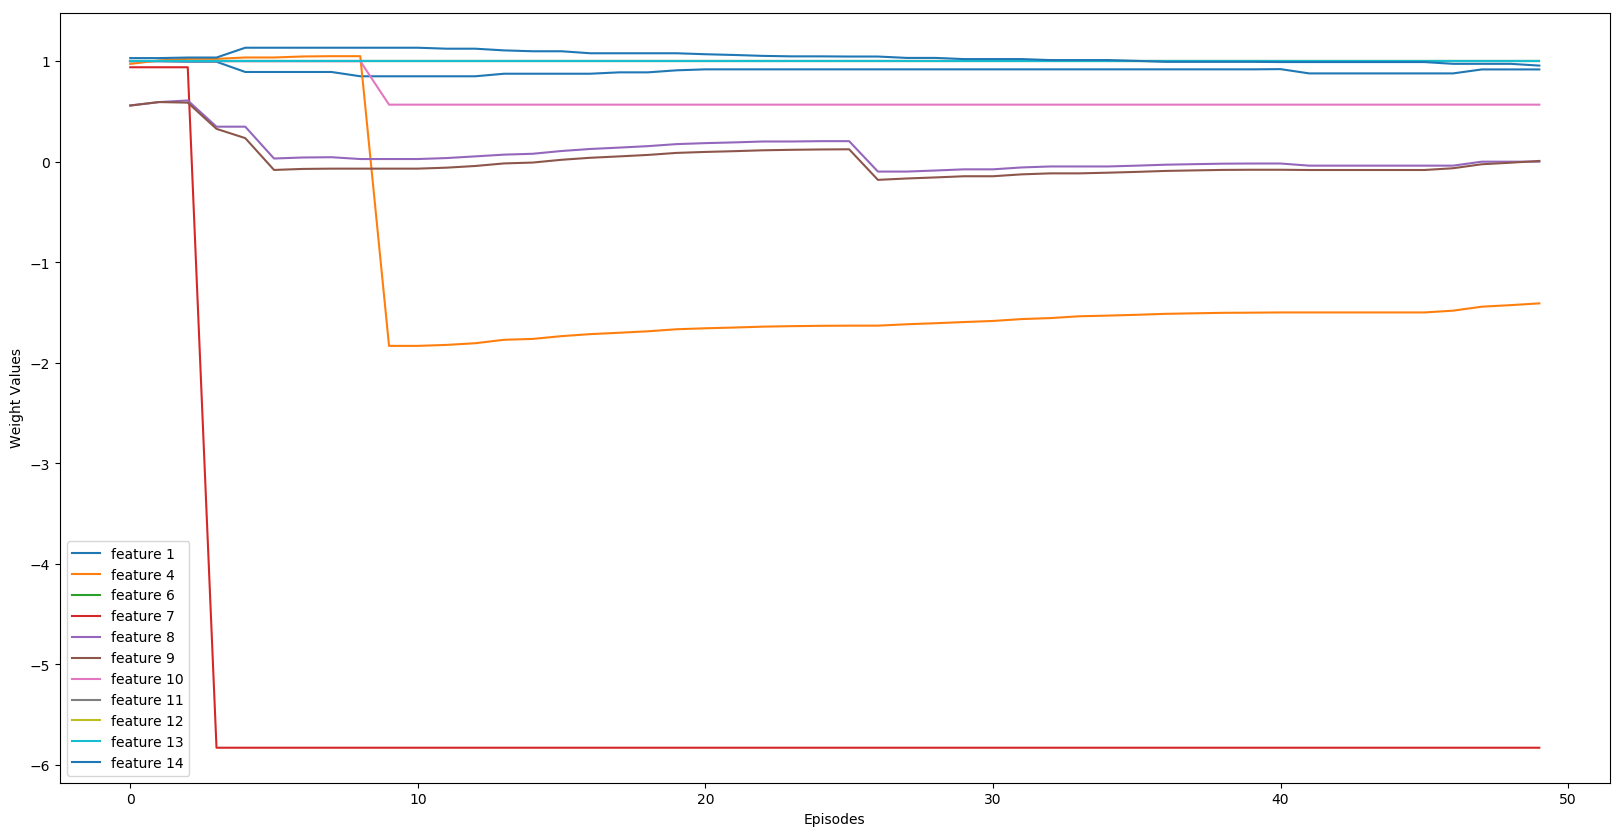

[ 9.18097770e-01  2.74615211e+02  2.98007591e+02 -1.40935426e+00
 -2.99204110e+01  1.00000000e+00 -5.83028166e+00  4.35662930e-04
  7.71426706e-03  5.67739314e-01  1.00000000e+00  1.00000000e+00
  1.00000000e+00  9.56248235e-01]


In [146]:
y1 = np.load('training_res/train_weights_Greed_init1_decr0.1.npy')
#y2 = np.load('training_res/train_rewards_Greed_initRand_const0.2.npy')[:46]
size = int(len(y1)/14)
y1 = y1[:].reshape(size, 14)
x = np.arange(size)
print(size)
plt.figure(figsize=(20, 10))
for feat in [0,3,5,6,7,8,9,10,11,12,13]:
    plt.plot(x, y1[:,feat], label='feature {}'.format(feat+1))
#plt.plot(x,y2)
#plt.title('Feature Changes During Greedy Training with Initial Value 1')
plt.xlabel('Episodes')
plt.ylabel('Weight Values')
plt.legend()
plt.show()
print(np.load('training_res/weights_Greed_init1_decr0.1.npy'))

In [122]:
y_val =[1824, 1795, 1825, 1820, -18, 1822, 556, 1804, 1821, 1816, 1836, 1804, -23, 1823, 1328, 1812, 1832, 1851, 1812, 1820, 1818, 1833, 1809, 1816, 1828, 1804, 1133, 1840, 151, 1800, 745, 1839, 1816, 1825, 1829, 1818, 1842, 1816, 1828, 1819, 1805, 1833, 1837, 1824, 1805, 1817, 1805, 1823, 1831, 1811, 1809, 1831, 1816, 366, 1106, 1794, 1793, 1822, 1808, 1838, 1813, 1295, 1801, 1803, 1808, 1814, 1844, 1808, 1778, 1804, 1798, 1827, 1826, 941, 1831, 1820, 1817, 1802, 1833, 1804, 1816, 1840, 1815, 1794, 1811, 1808, -232, 1609, 1805, 1826, -24, 731, 1822, 1809, 1837, 1814, 1821, 1802, 1802, 1822]


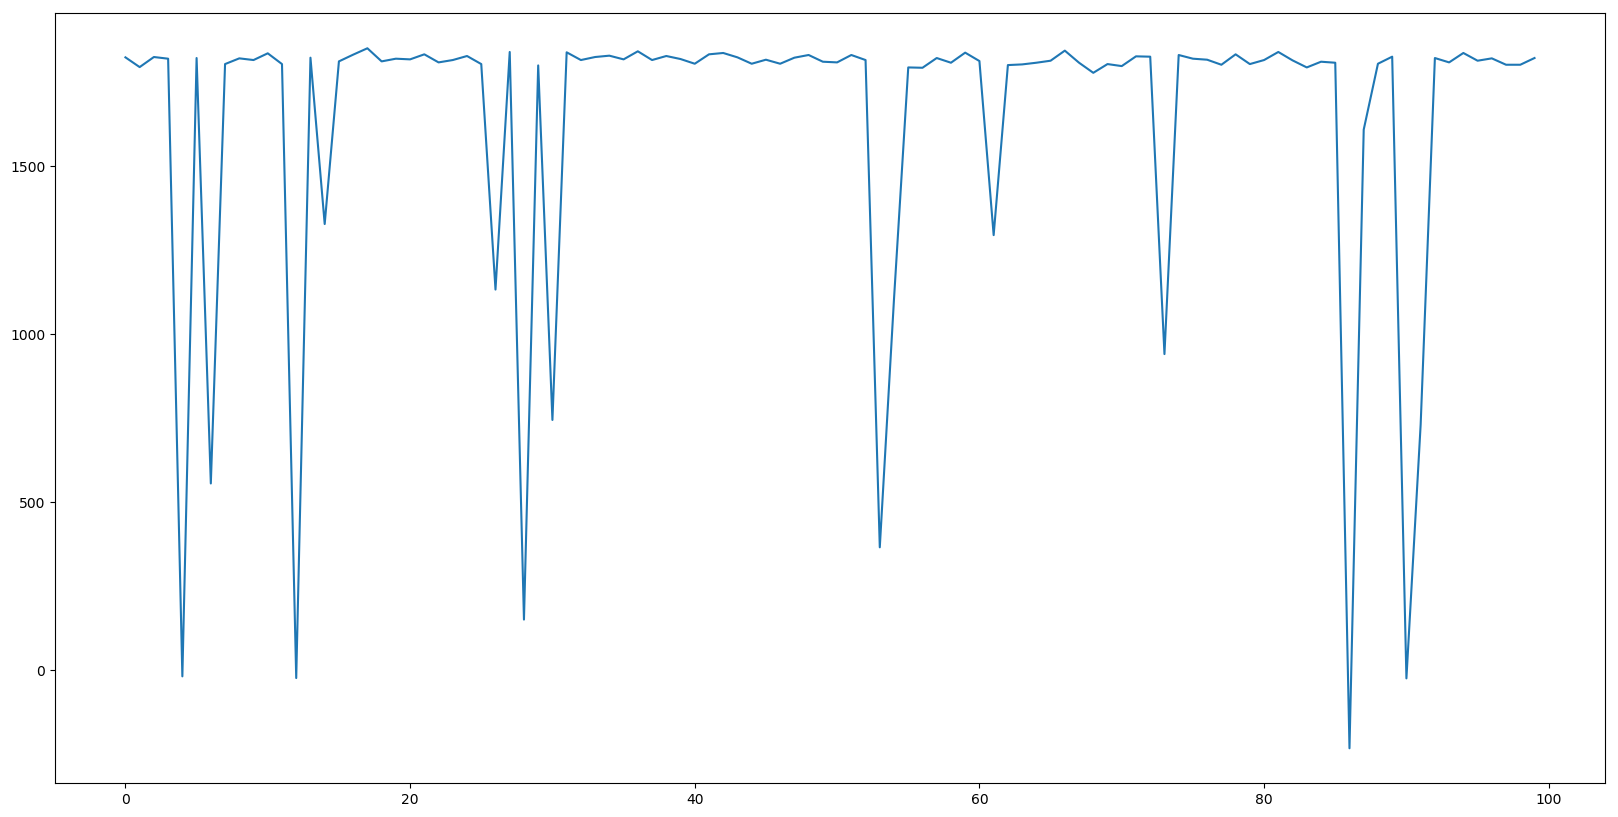

In [125]:
x_val = np.arange(len(y_val))
plt.figure(figsize=(20, 10))
plt.plot(x_val,y_val)
plt.show()

In [41]:
w = np.load('weights_greed_batch_handpicked_init_.npy')
w

array([ 0.35714286,  0.53571429, -2.5       , -0.35714286,  1.42857143,
       -0.17857143,  0.53571429,  0.35714286,  0.17857143,  0.17857143,
        0.28571429,  0.17857143,  0.35714286, -0.35714286])

In [81]:
w0 = np.array([1, 1.5, -7, -1, 4, -0.5, 1.5, 1, 0.5, 0.5, 0.8, 0.5,1,-1,1])
w0 /= np.sum(w0)
w0

array([ 0.26315789,  0.39473684, -1.84210526, -0.26315789,  1.05263158,
       -0.13157895,  0.39473684,  0.26315789,  0.13157895,  0.13157895,
        0.21052632,  0.13157895,  0.26315789, -0.26315789,  0.26315789])

In [100]:
w = np.load('weights_greed_batch_handpicked_init_.npy')
w

array([ 0.35714286,  0.53571429, -2.5       , -0.35714286,  1.42857143,
       -0.17857143,  0.53571429,  0.35714286,  0.17857143,  0.17857143,
        0.28571429,  0.17857143,  0.35714286, -0.35714286])

In [53]:
y1 = np.load('train_weights_greed_batch_handpicked_init_.npy')
#y2 = np.load('training_res/batch_update/train_rewards_greed_batch_handpicked_init_.npy')
size = int(len(y1)/14)
weights = y1.reshape((size, 14))
#plt.figure(figsize=(20, 10))
#for feat in range(14):
#    plt.plot(x, weights[:,feat], label='feature {}'.format(feat+1))

#plt.title('Feature Changes During Greedy Training with Initial Value 1')
#plt.xlabel('Episodes')
#plt.ylabel('Weight Values')
#plt.legend()
#plt.show()
#print(np.load('training_res/batch_update/weights_greed_batch_handpicked_init_.npy'))


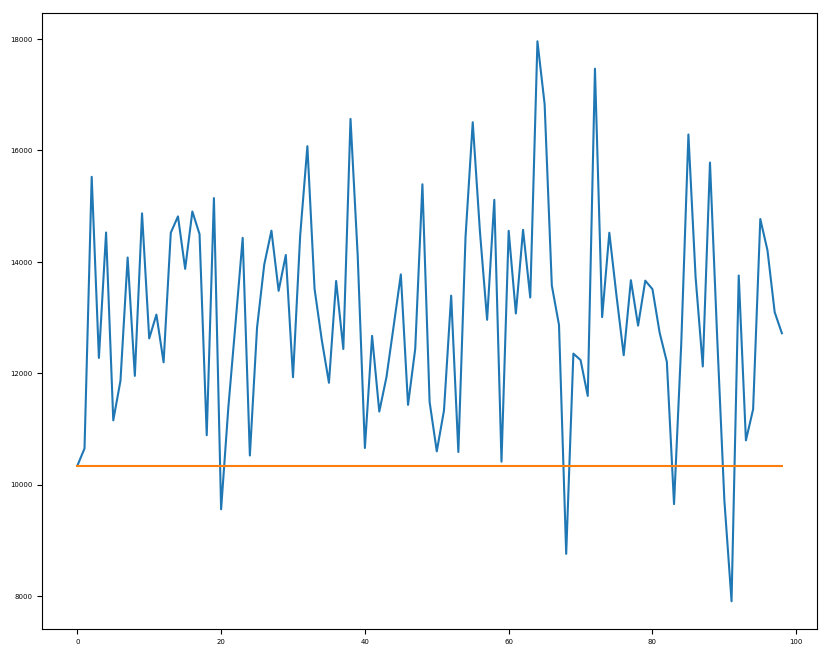

13076.555555555555


In [122]:
rewards = [line.rstrip('\n') for line in open('C:/Users/Lily/Desktop/rewards.txt')]
rewards[0] = '10337'
rewards = [int(s) for s in rewards]
x = np.arange(len(rewards))
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(rewards)), rewards)
plt.plot(x, [10337]*len(x))
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, rewards, 1))(np.unique(x)))
plt.show()
print(np.average(rewards))

In [124]:
d = [{'a':1, 'b':2, 'c':3}, {'a':1, 'b':2, 'c':3}, {'a':1, 'b':2, 'c':3}]
np.sum([i['c'] for i in d])

9